In [2]:
%load_ext autoreload
%autoreload 2
import torch
from torch.optim import Adam
from matplotlib import pyplot as plt
from utils import get_mnist_data
from models import ConvNN, SmoothClassifier
from training_and_evaluation import train_model
from torch.nn.functional import cross_entropy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 3: Randomized smoothing training
In this notebook we train a smooth classifier via the principle of randomized smoothing.

In [3]:
mnist_trainset = get_mnist_data(train=True)
mnist_testset = get_mnist_data(train=False)
use_cuda = torch.cuda.is_available()
base_classifier = ConvNN()
if use_cuda:
    base_classifier = base_classifier.cuda()

In [4]:
sigma = 1
batch_size = 128
lr = 1e-3
epochs = 1

### Creating a smooth classifier

In [5]:
model = SmoothClassifier(base_classifier=base_classifier, num_classes=10, sigma=sigma)
opt = Adam(model.parameters(), lr=lr)

In [6]:
def loss_function(x, y, model):
    logits = model(x).cpu()
    loss = cross_entropy(logits, y)
    return loss, logits

In [7]:
losses, accuracies = train_model(model, mnist_trainset, batch_size=batch_size, loss_function=loss_function, optimizer=opt)

In [8]:
torch.save(model.base_classifier.state_dict(), "models/randomized_smoothing.checkpoint")

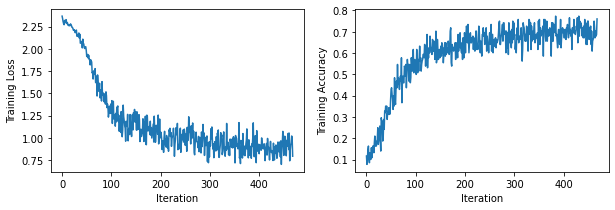

In [9]:
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(accuracies)
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.show()